<a href="https://colab.research.google.com/github/andrevcmelo/intro_cd/blob/master/intro_cd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link base de dados: https://raw.githubusercontent.com/andrevcmelo/intro_cd/master/transito-2016.csv

# **1. Coletar Dados**

**Importação de bibliotecas e base de dados**

In [0]:
import numpy as np
import pandas as pd

In [0]:
chamadosCTTU=pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/intro_cd/master/transito-2016.csv",sep=';', quotechar='"', decimal=",")

# **2. Realizar pré-processamento dos dados**

**Validar importação do arquivo base "Chamados Atendidos pela CTTU em 2016"**

In [0]:
print(chamadosCTTU.head())

In [0]:
chamadosCTTU.shape

**Definindo campos categóricos**

In [0]:
chamadosCTTU.dtypes

In [0]:
#ajustando tipos dos dados
chamadosCTTU['tipo_atendimento'] = chamadosCTTU['tipo_atendimento'].astype('category')
chamadosCTTU['situacao'] = chamadosCTTU['situacao'].astype('category')
chamadosCTTU['bairro'] = chamadosCTTU['bairro'].astype('category')
chamadosCTTU['tipo_ocorrencia'] = chamadosCTTU['tipo_ocorrencia'].astype('category')
chamadosCTTU.dtypes

In [0]:
chamadosCTTU['tipo_atendimento'].cat.categories

In [282]:
chamadosCTTU['situacao'].cat.categories

Index(['CANCELADA', 'EM ABERTO', 'EM ATENDIMENTO', 'FINALIZADA', 'PENDENTE'], dtype='object')

In [0]:
chamadosCTTU['bairro'].cat.categories

In [0]:
chamadosCTTU['tipo_ocorrencia'].cat.categories

In [0]:
print(chamadosCTTU.isnull().sum())

*Removendo as colunas "hora_aviso_equipe", "hora_chegada", "hora_saida", "detalhes" e "tempo_total", pois, ou estão vazias ou preenchidas com o texto "NÃO INFORMADO". Desta forma, apesar dos campos conterem informações importantes para cálculo de métricas e indicadores, os usuários não estão inserindo tais informações no sistema e a exclusão dos campos nesta análise irá favorecer no desempenho das demais análises.*

In [0]:
chamadosCTTU2 = chamadosCTTU.drop(columns=['hora_aviso_equipe', 'hora_chegada', 'hora_saida', 'detalhes', 'tempo_total'])

In [0]:
chamadosCTTU2.shape

In [0]:
chamadosCTTU2.dtypes

In [0]:
#Alterando os quantitativos NaN para 0
chamadosCTTU2.moto.fillna(0, inplace=True)
chamadosCTTU2.auto.fillna(0, inplace=True)
chamadosCTTU2.ciclomotor.fillna(0, inplace=True)
chamadosCTTU2.caminhao.fillna(0, inplace=True)
chamadosCTTU2.viatura.fillna(0, inplace=True)
chamadosCTTU2.vitimas.fillna(0, inplace=True)
chamadosCTTU2.ciclista.fillna(0, inplace=True)
chamadosCTTU2.pedestre.fillna(0, inplace=True)
chamadosCTTU2.onibus.fillna(0, inplace=True)
chamadosCTTU2.outro.fillna(0, inplace=True)

In [0]:
print(chamadosCTTU2.isnull().sum())

In [0]:
print(chamadosCTTU2.describe())

In [0]:
print(chamadosCTTU.head())

**Tratamento de dados: Deletar linhas vazias dos campos 'tipo_atendimento', 'situacao',  'data_chamado', 'hora_chamado', 'tipo_ocorrencia'**

*Obs: os campos numéricos contendo o quantitativo vazio de envolvidos em acidentes não serão excluídos ou inputados, pois influencia diretamente no grau do incidente de trânsito*

In [0]:
chamadosCTTU3 = chamadosCTTU2.dropna(subset=['tipo_atendimento','situacao', 'data_chamado', 'hora_chamado','tipo_ocorrencia'])

In [0]:
print(chamadosCTTU3.shape)
print("~~~~~~~~~")
print(chamadosCTTU3.dtypes)
print("~~~~~~~~~")
print(chamadosCTTU3.isnull().sum())
print("~~~~~~~~~")
print(chamadosCTTU3.head())

In [0]:
chamadosCTTU3.describe()

In [0]:
#criar campo com a soma dos envolvidos por chamado
chamadosCTTU3['sum_envolvidos'] = chamadosCTTU3['auto'] + chamadosCTTU3['moto'] + chamadosCTTU3['ciclomotor'] + chamadosCTTU3['caminhao'] + chamadosCTTU3['viatura'] + chamadosCTTU3['ciclista'] + chamadosCTTU3['pedestre'] + chamadosCTTU3['onibus'] + chamadosCTTU3['outro']

**Normalização min-max em Vitimas**

In [0]:
chamadosCTTU3['vitimas_norm']= (chamadosCTTU3['vitimas'] - chamadosCTTU3['vitimas'].min()) / (chamadosCTTU3['vitimas'].max() - chamadosCTTU3['vitimas'].min())

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
chamadosCTTU3['vitimas_norm'] = scaler.fit_transform(chamadosCTTU3[['vitimas']])
chamadosCTTU3['vitimas_norm'].describe()

In [0]:
chamadosCTTU3['vitimas'].plot.box()

In [0]:
chamadosCTTU3['vitimas'].hist()

In [0]:
chamadosCTTU3['vitimas_norm'].plot.box()

In [0]:
chamadosCTTU3['vitimas_norm'].hist()

**Normalização por Média e Desvio Padrão em:
1) Vitimas
2) sum_envolvidos (soma de veículos envolvidos)**

In [0]:
chamadosCTTU3['vitimas_norm2'] = (chamadosCTTU3['vitimas'] - chamadosCTTU3['vitimas'].mean()) / (chamadosCTTU3['vitimas'].std())
chamadosCTTU3['vitimas_norm2'].describe()

In [0]:
chamadosCTTU3['vitimas_norm2'].plot.box()

In [0]:
chamadosCTTU3['sum_envolvidos_norm2'] = (chamadosCTTU3['sum_envolvidos'] - chamadosCTTU3['sum_envolvidos'].mean()) / (chamadosCTTU3['sum_envolvidos'].std())
chamadosCTTU3['sum_envolvidos_norm2'].describe()

In [0]:
chamadosCTTU3['sum_envolvidos_norm'] = scaler.fit_transform(chamadosCTTU3[['sum_envolvidos']])
chamadosCTTU3['sum_envolvidos_norm'].describe()
chamadosCTTU3['sum_envolvidos_norm'].plot.box()

**Normalizaçao 2: Nova tabela contendo somente os registros com sum_envolvidos (soma de envolvidos) > 0**

In [0]:
chamadosCTTU4 = chamadosCTTU3[chamadosCTTU3.sum_envolvidos > 0]
#normalização min-max
chamadosCTTU4['sum_envolvidos_norm'] = (chamadosCTTU4['sum_envolvidos'] - chamadosCTTU4['sum_envolvidos'].mean()) / (chamadosCTTU4['sum_envolvidos'].std())
#normalização média-desvio padrão
chamadosCTTU4['sum_envolvidos_norm2'] = (chamadosCTTU4['sum_envolvidos'] - chamadosCTTU4['sum_envolvidos'].mean()) / (chamadosCTTU4['sum_envolvidos'].std())

In [0]:
#Tabela a ser utilizada nos testes de Discretização
chamadosCTTU5 = chamadosCTTU4.drop(columns=['vitimas_norm','vitimas_norm2'])

In [0]:
print(chamadosCTTU5.shape)
print("~~~~~~~~~")
print(chamadosCTTU5.describe())
print("~~~~~~~~~")
print(chamadosCTTU5.isnull().sum())
print("~~~~~~~~~")
print(chamadosCTTU5.head())

In [0]:
counts = chamadosCTTU5['tipo_atendimento'].value_counts()
counts.plot.bar(rot=90)

In [0]:
chamadosCTTU5.head()

In [0]:
chamadosCTTU5['sum_envolvidos_norm'].plot.box()

In [0]:
chamadosCTTU5['sum_envolvidos_norm'].hist()

**Discretizando sum_envolvidos**

In [0]:
chamadosCTTU5['sum_envolvidos_dist'] = pd.cut(chamadosCTTU5['sum_envolvidos'],10)

In [0]:
chamadosCTTU5['sum_envolvidos'].value_counts()

In [0]:
counts = chamadosCTTU5['sum_envolvidos'].value_counts()
counts.plot.bar(rot=90)

In [0]:
chamadosCTTU5['sum_envolvidos'].describe()

In [0]:
chamadosCTTU5['sum_envolvidos_dist'] = pd.qcut(chamadosCTTU5['sum_envolvidos'].rank(method='first'),4)

chamadosCTTU5['sum_envolvidos_dist'].value_counts()

In [0]:
count2 = chamadosCTTU5['sum_envolvidos_dist'].value_counts()
count2.plot.bar(rot=90)

**Removendo Outliers  z-score robusto (univariado)**

In [0]:
chamadosCTTU5['sum_envolvidos_norm'].describe()

In [0]:
chamadosCTTU5['sum_envolvidos'].plot.box()

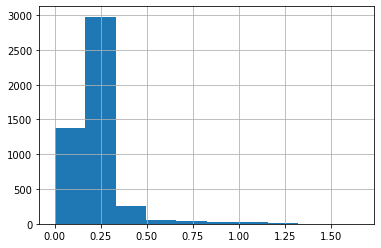

In [243]:
from numpy import log10
chamadosCTTU5['sum_envolvidos_log'] = log10(chamadosCTTU5['sum_envolvidos'])
chamadosCTTU5['sum_envolvidos_log'].hist()

In [244]:
chamadosCTTU5['sum_envolvidos_log'].mad()

0.13873890405635803

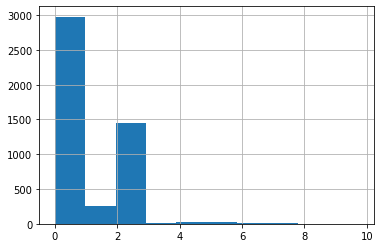

In [246]:
(abs(chamadosCTTU5['sum_envolvidos_log']-chamadosCTTU5['sum_envolvidos_log'].median())/chamadosCTTU5['sum_envolvidos_log'].mad()).hist()

In [0]:
chamadosCTTU5[abs(chamadosCTTU5['sum_envolvidos_log']-chamadosCTTU5['sum_envolvidos_log'].median())/chamadosCTTU5['sum_envolvidos_log'].mad() > 3.5]

In [259]:
chamadosCTTU5 = chamadosCTTU5[abs(chamadosCTTU5['sum_envolvidos_log']-chamadosCTTU5['sum_envolvidos_log'].median())/chamadosCTTU5['sum_envolvidos_log'].mad() < 3.5]
print(len(chamadosCTTU5))

4681


**Removendo Outliers Tukey (univariado)**

In [19]:
chamadosCTTU5['sum_envolvidos'].describe()

count    4762.000000
mean        1.944141
std         1.490652
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        45.000000
Name: sum_envolvidos, dtype: float64

In [0]:
chamadosCTTU5['sum_envolvidos'].plot.box()

In [0]:
chamadosCTTU5['sum_envolvidos'].hist()

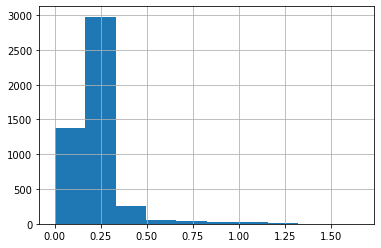

In [20]:
from numpy import log10
chamadosCTTU5['sum_envolvidos_log'] = log10(chamadosCTTU5['sum_envolvidos'])
chamadosCTTU5['sum_envolvidos_log'].hist()

In [21]:
q1 = chamadosCTTU5['sum_envolvidos_log'].quantile(q=0.25)
q3 = chamadosCTTU5['sum_envolvidos_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.3010299956639812


In [22]:
chamadosCTTU5[chamadosCTTU5['sum_envolvidos_log'] < (q1-1.5*iqr)]

,tipo_atendimento,situacao,data_chamado,hora_chamado,bairro,endereco,numero,complemento,tipo_ocorrencia,auto,moto,ciclomotor,ciclista,pedestre,onibus,caminhao,viatura,outro,vitimas,sum_envolvidos,sum_envolvidos_norm,sum_envolvidos_norm2,sum_envolvidos_log


In [23]:
chamadosCTTU5[chamadosCTTU5['sum_envolvidos_log'] > (q3+1.5*iqr)]

,tipo_atendimento,situacao,data_chamado,hora_chamado,bairro,endereco,numero,complemento,tipo_ocorrencia,auto,moto,ciclomotor,ciclista,pedestre,onibus,caminhao,viatura,outro,vitimas,sum_envolvidos,sum_envolvidos_norm,sum_envolvidos_norm2,sum_envolvidos_log
74,"""FISCALIZAÇÃO""",PENDENTE,01/02/2016,14:04,BOA VISTA,"""AV MANOEL BORBA""",NaN,"""E/F AO HAPVIDA""","""FISCALIZAÇÃO""",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.733406,4.733406,0.954243
92,"""FISCALIZAÇÃO""",PENDENTE,01/02/2016,15:44,BOA VIAGEM,"""RUA PROFESSOR ALOISIO PESSOA DE ARAUJO""",65,"""RUA DO BANCO DAYCOVAL""","""FISCALIZAÇÃO""",15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,8.758492,8.758492,1.176091
257,"""FISCALIZAÇÃO""",PENDENTE,03/02/2016,12:37,PINA,"""RUA CARACATUBA""",NaN,"""PARALELA A ENG ANTONIO DE GOES, E/F AO EMPRES...","""FISCALIZAÇÃO""",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.404254,5.404254,1.000000
524,"""COM VÍTIMA""",FINALIZADA,01/01/2016,23:09,BEBERIBE,"""AV BEBERIBE""",4510,"""NO POSTO DE SAUDE DE BEBERIBE ""","""ATROPELAMENTO""",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,8.0,4.062558,4.062558,0.903090
1249,"""FISCALIZAÇÃO""",EM ATENDIMENTO,11/02/2016,12:05,GRAÇAS,"""RUA GERVASIO FIORAVANTE""",NaN,"""ESCOLA DO COLÉGIO ENCONTRO""","""FISCALIZAÇÃO""",15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,8.758492,8.758492,1.176091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,"""FISCALIZAÇÃO""",PENDENTE,25/03/2016,14:02,GRAÇAS,"""RUA DAS PERNAMBUCANAS""","""PT DE TÁXI HOSPITAL JAYME DA FONTE""",NaN,"""FISCALIZAÇÃO""",7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.391711,3.391711,0.845098
9423,"""FISCALIZAÇÃO""",FINALIZADA,25/03/2016,14:26,DERBY,"""AV GOVERNADOR AGAMENON MAGALHAES""","""HOSPITAL DA RESTAURACAO""",NaN,"""FISCALIZAÇÃO""",12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.745949,6.745949,1.079181
9611,"""FISCALIZAÇÃO""",PENDENTE,29/03/2016,13:32,CORDEIRO,"""AV CAXANGA""","""E/F AO CAXANGA GRILL""",NaN,"""FISCALIZAÇÃO""",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.404254,5.404254,1.000000
9620,"""ENTRADA E SAÍDA""",PENDENTE,29/03/2016,15:47,IPUTINGA,"""RUA GASPAR PEREZ""","""EM FRENTE AO ESTACIONAMENTO DO ESCRITORIO WAL...",NaN,"""ENTRADA E SAÍDA""",15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,8.758492,8.758492,1.176091


In [24]:
chamadosCTTU5 = chamadosCTTU5[(chamadosCTTU5['sum_envolvidos_log'] > (q1-1.5*iqr)) & (chamadosCTTU5['sum_envolvidos_log'] < (q3+1.5*iqr))]
len(chamadosCTTU5)

4681

**Pelo método Tukey foi possível identificar os outliers**

In [0]:
chamadosCTTU5['sum_envolvidos_log'].describe()

In [0]:
chamadosCTTU5['sum_envolvidos_log'].plot.box()

In [0]:
chamadosCTTU5['sum_envolvidos_log'].hist()

**Removendo outliers usando razão de duas variáveis (bivariado), que serão Soma dos envolvidos nos acidentes VS Vitimas**

In [25]:
#Tabela a ser utilizada nos testes de remoção de outliers - bivariado
chamadosCTTU6 = chamadosCTTU4.drop(columns=['vitimas_norm','vitimas_norm2'])
chamadosCTTU7 = chamadosCTTU6[chamadosCTTU6.vitimas > 0]
len(chamadosCTTU7)

502

In [0]:
chamadosCTTU7.plot.scatter(x='sum_envolvidos',y='vitimas')

**O quantitativo de registros cai consideravalmente quando filtrado para os acidentes que envolveram vítimas**

In [0]:
#média de envolvidos nos acientes por número de vítimas, sendo entitulado como "grau do acidente"
chamadosCTTU7['grau_acidente'] = chamadosCTTU7['sum_envolvidos'] / chamadosCTTU7['vitimas']
chamadosCTTU7['grau_acidente'].describe()

In [0]:
chamadosCTTU7['grau_acidente'].plot.box()

In [0]:
chamadosCTTU7['grau_acidente'].hist()

In [0]:
from numpy import log10
chamadosCTTU7['grau_acidente_log'] = log10(chamadosCTTU7['grau_acidente'])
chamadosCTTU7['grau_acidente_log'].describe()

In [0]:
(abs(chamadosCTTU7['grau_acidente_log']-chamadosCTTU7['grau_acidente_log'].median())/chamadosCTTU7['grau_acidente_log'].mad()).hist()

In [0]:
chamadosCTTU7[abs(chamadosCTTU7['grau_acidente_log']-chamadosCTTU7['grau_acidente_log'].median())/chamadosCTTU7['grau_acidente_log'].mad() > 3.5]
len(chamadosCTTU7)

In [0]:
chamadosCTTU7 = chamadosCTTU7[abs(chamadosCTTU7['grau_acidente_log']-chamadosCTTU7['grau_acidente_log'].median())/chamadosCTTU7['grau_acidente_log'].mad() < 3.5]
len(chamadosCTTU7)

In [0]:
chamadosCTTU7['grau_acidente_log'].hist()

# **3. Apresentar estatísticas descritivas dos dados com visualizações**

In [0]:
#Utilizaremos a tabela chamadosCTTU3 para as análises abaixo

In [0]:
chamadosCTTU3.shape

In [0]:
#retirando os chamados cancelados
chamadosCTTU3 = chamadosCTTU3[chamadosCTTU3['situacao'] != 'CANCELADA']

In [0]:
#retirando os chamados sem individuos ou automóveis envolvidos
chamadosCTTU3 = chamadosCTTU3[chamadosCTTU3['sum_envolvidos'] > 0]

In [0]:
print(chamadosCTTU3.shape)
chamadosCTTU3.head()

In [40]:
#média de envolvidos (autos, motos, caminhões, etc) por acidente
print(chamadosCTTU3.sum_envolvidos.mean())
#mediana de envolvidos (autos, motos, caminhões, etc) por acidente
print(chamadosCTTU3.sum_envolvidos.median())
#moda de envolvidos (autos, motos, caminhões, etc) por acidente
print(chamadosCTTU3.sum_envolvidos.mode())
#variância de envolvidos (autos, motos, caminhões, etc) por acidente
print(chamadosCTTU3.sum_envolvidos.var())
#desvio padrão de envolvidos (autos, motos, caminhões, etc) por acidente
print(chamadosCTTU3.sum_envolvidos.std())

0.9027264325323475
0.0
0    0.0
dtype: float64
2.137041670270831
1.4618623978578937


In [0]:
chamadosCTTU3.sum_envolvidos.describe()

In [41]:
#cálculo IQR da soma dos envolvidos por acidentes
chamadosCTTU3.sum_envolvidos.describe()[6] - chamadosCTTU3.sum_envolvidos.describe()[4]

2.0

In [0]:
chamadosCTTU3.boxplot(column=['vitimas'])

In [0]:
#cálculo de vítimas por envolvidos por acidentes
chamadosCTTU3['vitimas_por_envolvidos_acidente'] = chamadosCTTU3['vitimas']/chamadosCTTU3['sum_envolvidos']

In [44]:
#cálculo de média de vítimas por envolvidos em acidentes em Boa Viagem
chamadosCTTU3[(chamadosCTTU3.vitimas > 0) & (chamadosCTTU3.sum_envolvidos > 0) & (chamadosCTTU3.bairro == 'BOA VIAGEM')].vitimas_por_envolvidos_acidente.mean()

0.6346405228758168

In [0]:
#cálculo da média e mediana de vítimas por envolvidos em acidentes por bairro para chamados FINALIZADOS
chamadosCTTU3[chamadosCTTU3['situacao'] == 'FINALIZADA'].groupby(['bairro']).agg(['mean','median'])['vitimas_por_envolvidos_acidente']

In [0]:
# Medias do valor de vítimas por envolvidos em acidentes por bairro para chamados FINALIZADOS
chamadosCTTU3[chamadosCTTU3['situacao'] == 'FINALIZADA'].groupby(['bairro'])['vitimas_por_envolvidos_acidente'].mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [0]:
#Estatísticas bivariadas
#Os maiores envolvidos em acidentes são automóveis e motos
chamadosCTTU3[chamadosCTTU3['situacao'] == 'FINALIZADA'].cov()

In [0]:
#Estatísticas bivariadas
#Moto é o meio de transporte que mais resulta em vítimas em acidentes
chamadosCTTU3[chamadosCTTU3['situacao'] == 'FINALIZADA'].corr(method='pearson')

In [0]:
#Estatísticas bivariadas
#Moto é o meio de transporte que mais resulta em vítimas em acidentes
chamadosCTTU3[chamadosCTTU3['situacao'] == 'FINALIZADA'].corr(method='spearman')

In [0]:
#Estatísticas bivariadas
chamadosCTTU3.plot.scatter(x='moto',y='vitimas')

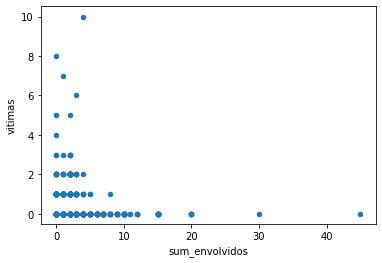

In [59]:
#Estatísticas bivariadas
chamadosCTTU3.plot.scatter(x='sum_envolvidos',y='vitimas')